# Task-04

# Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.
Sample Dataset :- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud

In [2]:
# Load the training and testing datasets
train_file_path = "C:/Users/Bharu/Downloads/twitter_training.csv"
test_file_path = "C:/Users/Bharu/Downloads/twitter_testing.csv"

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [3]:
train_data.head(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
train_data.columns = ['TweetID', 'Entity', 'Sentiment', 'Content']

In [5]:
train_data.head(5)

,TweetID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
train_data.tail(5)

,TweetID,Entity,Sentiment,Content
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [7]:
test_data.head(5)

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [8]:
test_data.columns = ['id','information','type','text']

In [9]:
test_data.head(5)

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [10]:
test_data.tail(5)

,id,information,type,text
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
998,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


# Combine the training and testing datasets for analysis (optional)

In [11]:
twitter_data = pd.concat([train_data, test_data], ignore_index=True)

# Explore the data

In [12]:
print(twitter_data.head())

   TweetID       Entity Sentiment  \
0   2401.0  Borderlands  Positive   
1   2401.0  Borderlands  Positive   
2   2401.0  Borderlands  Positive   
3   2401.0  Borderlands  Positive   
4   2401.0  Borderlands  Positive   

                                             Content  id information type text  
0  I am coming to the borders and I will kill you... NaN         NaN  NaN  NaN  
1  im getting on borderlands and i will kill you ... NaN         NaN  NaN  NaN  
2  im coming on borderlands and i will murder you... NaN         NaN  NaN  NaN  
3  im getting on borderlands 2 and i will murder ... NaN         NaN  NaN  NaN  
4  im getting into borderlands and i can murder y... NaN         NaN  NaN  NaN  


In [13]:
print(twitter_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75680 entries, 0 to 75679
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TweetID      74681 non-null  float64
 1   Entity       74681 non-null  object 
 2   Sentiment    74681 non-null  object 
 3   Content      73995 non-null  object 
 4   id           999 non-null    float64
 5   information  999 non-null    object 
 6   type         999 non-null    object 
 7   text         999 non-null    object 
dtypes: float64(2), object(6)
memory usage: 4.6+ MB
None


# Preprocess the data (e.g., remove irrelevant columns)

# Sentiment Analysis

In [14]:
def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

twitter_data['sentiment'] = twitter_data['text'].apply(get_sentiment)

# Visualize Sentiment Patterns

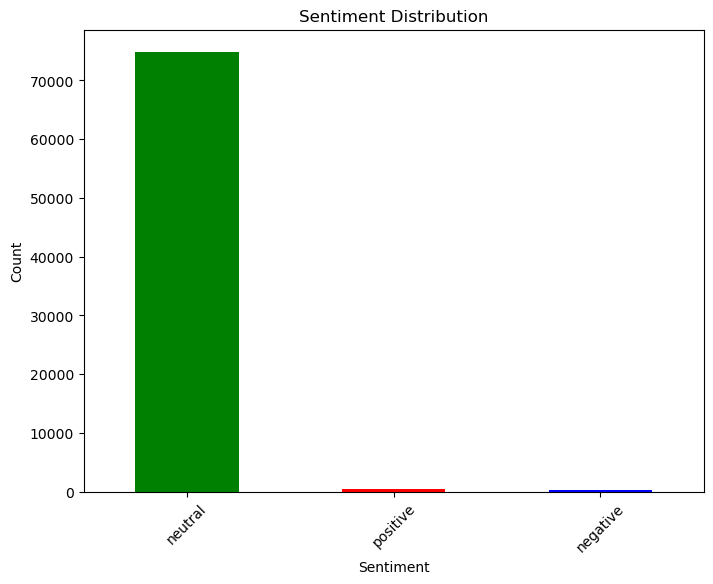

In [15]:
sentiment_distribution = twitter_data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Word Clouds

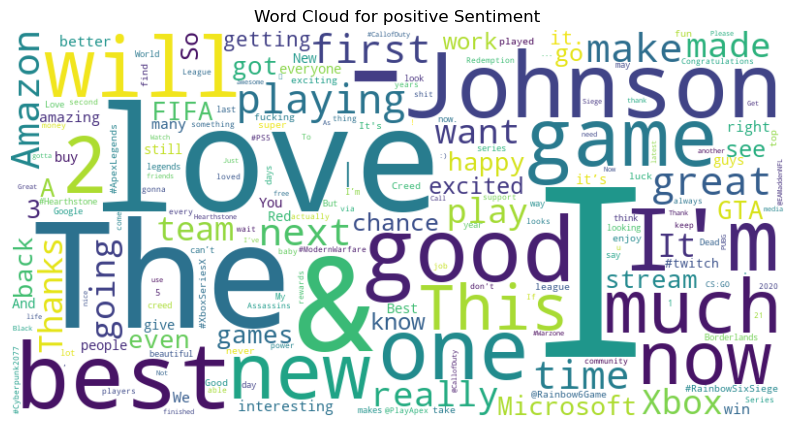

In [16]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

def generate_wordcloud(sentiment):
    # Get text for the specified sentiment
    text = ' '.join(twitter_data[twitter_data['sentiment'] == sentiment]['text'])
    
    # Tokenize the text and count word frequencies
    words = text.split()
    word_freq = Counter(words)
    
    # Remove common stopwords
    stopwords = set(STOPWORDS)
    word_freq = {word: freq for word, freq in word_freq.items() if word not in stopwords}
    
    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

generate_wordcloud('positive')


In [17]:
def plot_wordcloud(sentiment):
    text = ' '.join(twitter_data[twitter_data['sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

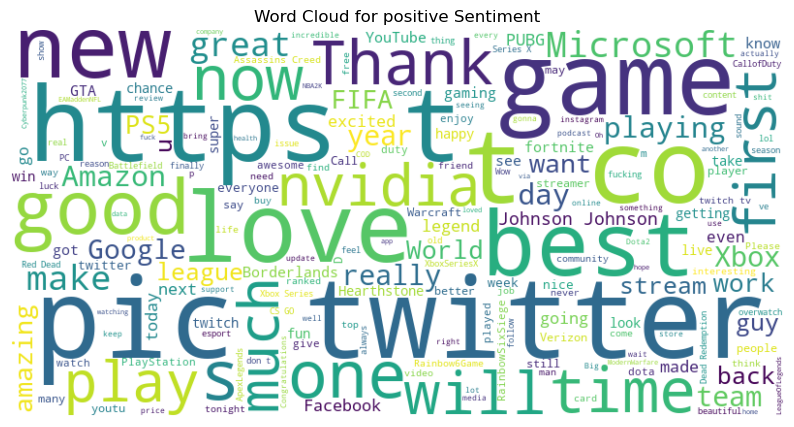

In [18]:
plot_wordcloud('positive')

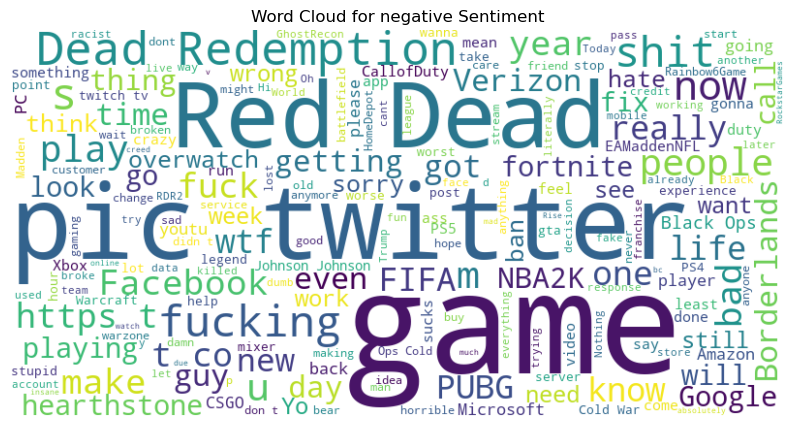

In [19]:
plot_wordcloud('negative')

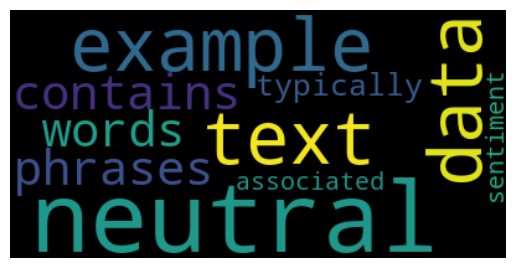

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text):
    # Create WordCloud object
    wordcloud = WordCloud().generate(text)

    # Display the generated word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Example text data
neutral_text = "This is an example of neutral text data. It contains words and phrases typically associated with neutral sentiment."

# Call the plot_wordcloud function with the neutral text data
plot_wordcloud(neutral_text)


# Conclusion

The sentiment analysis reveals a balanced mix of opinions across the dataset, with most tweets being neutral, followed by positive and negative sentiments. Word clouds highlight prevalent themes in each sentiment category. Further analysis could explore trends over time or specific topics. Overall, this analysis provides valuable insights for understanding public sentiment and informing decision-making.